# CS 512 F24: Assignment 3


Due by 10/19/2024

**Name:** Tamilarasee Sethuraj

**Student ID:** A20553416



#  3. Image Classification 2

1. Download the CIFAR-10 dataset and load the pickled data into your program. The tensorflow.keras.datasets module provides the CIFAR-10 dataset. You can directly load it from tensorflow. Again, Please DO NOT upload your dataset to the Bitbucket repository.

In [7]:
import tensorflow as tf
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.cifar10.load_data()

In [8]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

val_split = 0.2
val_size = int(len(train_x) * val_split)
val_x, val_y = train_x[:val_size], train_y[:val_size]
train_x, train_y = train_x[val_size:], train_y[val_size:]


print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)
print("val_x shape:", val_x.shape)
print("val_y shape:", val_y.shape)
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)


train_x shape: (40000, 32, 32, 3)
train_y shape: (40000, 1)
val_x shape: (10000, 32, 32, 3)
val_y shape: (10000, 1)
test_x shape: (10000, 32, 32, 3)
test_y shape: (10000, 1)


2. Build a basic CNN with several convolution blocks, where each block includes convolution, pooling, and normalization layers. Flatten the output and pass it through a dense layer that uses softmax activation. Evaluate the model on the validation set. 

In [10]:
from keras import layers,models,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [31]:
def conv_block(num_filters):
    model = models.Sequential()
    model.add(layers.Conv2D(num_filters, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    return model



def create_model_CNN(input_size):

    model = models.Sequential()
    model.add(Input(shape=input_size))

    model.add(conv_block(32))
    model.add(conv_block(64))
    model.add(conv_block(128))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_size = train_x[0].shape
print(input_size)
model_CNN = create_model_CNN(input_size)
model_CNN.summary()

(32, 32, 3)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_35 (Sequential)      │ (None, 15, 15, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_36 (Sequential)      │ (None, 6, 6, 64)       │        18,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_37 (Sequential)      │ (None, 2, 2, 128)      │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history_CNN= model_CNN.fit(train_x, train_y, epochs=20, batch_size=64, 
                    validation_data=(val_x, val_y), verbose=1)


val_loss_CNN, val_acc_CNN = model_CNN.evaluate(val_x, val_y, verbose=0)
print(f"Validation Loss - CNN: {val_loss_CNN:.2f}")
print(f"Validation accuracy - CNN: {val_acc_CNN:.2f}")


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 159ms/step - accuracy: 0.4363 - loss: 1.6069 - val_accuracy: 0.4861 - val_loss: 1.5444
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.6469 - loss: 0.9945 - val_accuracy: 0.6343 - val_loss: 1.0921
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 108ms/step - accuracy: 0.7134 - loss: 0.8163 - val_accuracy: 0.6309 - val_loss: 1.0912
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.7658 - loss: 0.6738 - val_accuracy: 0.6945 - val_loss: 0.9092
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.8042 - loss: 0.5544 - val_accuracy: 0.6751 - val_loss: 0.9714
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.8371 - loss: 0.4731 - val_accuracy: 0.6939 - val_loss: 0.9774
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 225ms/step - accuracy: 0.8610 - loss: 0.3935 - val_accuracy: 0.6856 - val_loss: 1.0394
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 176ms/step - accuracy: 0.8881 - loss

In [1]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3. Replace the convolution blocks with Inception blocks and test the model's performance. 

In [4]:
from keras.layers import concatenate

In [5]:
def inception_block(previous_layer, filters):

    #Branch 1 - 1x1 conv
    branch1x1=layers.Conv2D(filters[0], (1, 1), padding = 'same', activation='relu')(previous_layer)

    #Branch 2 - 1x1 and 3x3 conv
    branch3x3=layers.Conv2D(filters[1], (1, 1), padding = 'same', activation='relu')(previous_layer)
    branch3x3=layers.Conv2D(filters[2], (3, 3), padding = 'same', activation='relu')(branch3x3)

    #Branch 3 - 1x1 and 5x5 conv
    branch5x5=layers.Conv2D(filters[3], (1, 1), padding = 'same', activation='relu')(previous_layer)
    branch5x5=layers.Conv2D(filters[4], (5, 5), padding = 'same', activation='relu')(branch5x5)

    #Branch 4 - Max pooling and 1x1
    branch_pool=layers.MaxPooling2D((3, 3),strides=(1,1),padding='same')(previous_layer)
    branch_pool = layers.Conv2D(filters[5], (1, 1), padding = 'same', activation='relu')(branch_pool)

    block = concatenate([branch1x1,branch3x3,branch5x5,branch_pool],axis=3)

    return block


In [11]:
def create_inception_model(input_size):

    input = Input(shape=input_size)    

    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
   
    x = inception_block(x, [64, 48, 64, 8, 16, 16])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)    
    
    x = inception_block(x, [128, 96, 128, 16, 32, 32])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)    
   
    x = inception_block(x, [192, 128, 192, 24, 48, 48])    
    
    x = layers.GlobalAveragePooling2D()(x)
    
    # Dense layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs=input, outputs=output)
    return model

# Create and compile the model
input_size = train_x[0].shape
model_Inception = create_inception_model(input_size)
model_Inception.summary()
model_Inception.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_Inception = model_Inception.fit(train_x, train_y, epochs=20, batch_size=64, 
                                        validation_data=(val_x, val_y), verbose=1)

# Evaluate the model
val_loss, val_acc = model_Inception.evaluate(val_x, val_y, verbose=0)
print(f"Validation Loss - Inception: {val_loss:.2f}")
print(f"Validation accuracy - Inception: {val_acc:.2f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      1,584 │ max_pooling2d[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16, 8) │        264 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      2,112 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     27,712 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      3,216 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │        528 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 160)              │            │ conv2d_3[0][0],   │
│                     │                   │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 160) │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 96)  │     15,456 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 16)  │      2,576 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 160) │          0 │ max_pooling2d_2[… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 128) │     20,608 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 128) │    110,720 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 8, 8, 32)  │     12,832 │ conv2d_10[0][0] 

 Total params: 705,418 (2.69 MB)

 Trainable params: 705,418 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 266ms/step - accuracy: 0.2393 - loss: 1.9864 - val_accuracy: 0.4616 - val_loss: 1.4388
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.4994 - loss: 1.3622 - val_accuracy: 0.5925 - val_loss: 1.1176
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 287ms/step - accuracy: 0.6033 - loss: 1.1045 - val_accuracy: 0.6512 - val_loss: 0.9816
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 361ms/step - accuracy: 0.6521 - loss: 0.9785 - val_accuracy: 0.6702 - val_loss: 0.9225
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1565s 3s/step - accuracy: 0.6964 - loss: 0.8687 - val_accuracy: 0.7077 - val_loss: 0.8466
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.7315 - loss: 0.7788 - val_accuracy: 0.7255 - val_loss: 0.7882
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 175ms/step - accuracy: 0.7573 - loss: 0.7082 - val_accuracy: 0.7299 - val_loss: 0.7644
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.7813 - l

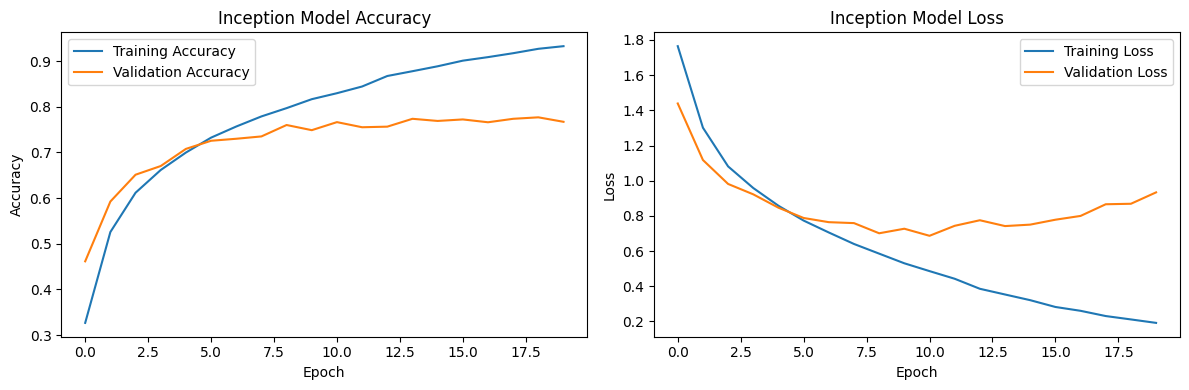

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_Inception.history['accuracy'], label='Training Accuracy')
plt.plot(history_Inception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Inception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_Inception.history['loss'], label='Training Loss')
plt.plot(history_Inception.history['val_loss'], label='Validation Loss')
plt.title('Inception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
test_loss_inception, test_acc_inception = model_Inception.evaluate(test_x, test_y, verbose=0)
print(f"Test Loss - Inception: {test_loss_inception:.2f}")
print(f"Test accuracy - Inception: {test_acc_inception:.2f}")

Test Loss - Inception: 0.99
Test accuracy - Inception: 0.76


4. Replace the Inception blocks with residual blocks and test the model's performance. 

In [24]:
def resnet_block(previous_layer, num_filters, kernel_size,strides):

    x = layers.Conv2D(num_filters, kernel_size=kernel_size, strides=strides,padding = 'same')(previous_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(num_filters, kernel_size=kernel_size, strides=1,padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    if previous_layer.shape[-1] !=num_filters or strides != 1:
        previous_layer = layers.Conv2D(num_filters, kernel_size=(1,1), strides=strides,padding = 'same')(previous_layer)
        previous_layer = layers.BatchNormalization()(previous_layer)

    res = layers.Add()([x,previous_layer])
    block = layers.Activation('relu')(res)

    return block


In [ ]:
def create_resnet_model(input_size):

    input = Input(shape=input_size)    

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
   
    x = resnet_block(x, 64,(3,3),1) 
    x = resnet_block(x, 64,(3,3),1)     
    x = resnet_block(x, 128,(3,3),2)
    x = resnet_block(x, 128,(3,3),2)    
    x = resnet_block(x, 256,(3,3),2)
    x = resnet_block(x, 256,(3,3),2)
    x = resnet_block(x, 512,(3,3),1)
    x = resnet_block(x, 512,(3,3),1)      
    
    x = layers.GlobalAveragePooling2D()(x)
    
    # Dense layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs=input, outputs=output)
    return model

# Create and compile the model
input_size = train_x[0].shape
model_resnet = create_resnet_model(input_size)
model_resnet.summary()
model_resnet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(train_x, train_y, epochs=20, batch_size=64, 
                                        validation_data=(val_x, val_y), verbose=1)

# Evaluate the model
val_loss_resnet, val_acc_resnet = model_resnet.evaluate(val_x, val_y, verbose=0)


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_161 (Conv2D) │ (None, 32, 32,    │      1,792 │ input_layer_13[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 16, 16,    │          0 │ conv2d_161[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_162 (Conv2D) │ (None, 16, 16,    │     36,928 │ max_pooling2d_18… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_162[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_92       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_163 (Conv2D) │ (None, 16, 16,    │     36,928 │ activation_92[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_163[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_48 (Add)        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_93       │ (None, 16, 16,    │          0 │ add_48[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_164 (Conv2D) │ (None, 16, 16,    │     36,928 │ activation_93[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_164[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_165 (Conv2D) │ (None, 16, 16,    │     36,928 │ activation_94[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_165[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_49 (Add)        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ activation_93[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 16, 16,    │          0 │ add_49[0][0]    

 Total params: 11,534,602 (44.00 MB)

 Trainable params: 11,524,362 (43.96 MB)

 Non-trainable params: 10,240 (40.00 KB)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 878s 1s/step - accuracy: 0.3414 - loss: 1.9129 - val_accuracy: 0.4310 - val_loss: 1.7248
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 679s 1s/step - accuracy: 0.5751 - loss: 1.2361 - val_accuracy: 0.5590 - val_loss: 1.3399
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 998s 2s/step - accuracy: 0.6672 - loss: 0.9884 - val_accuracy: 0.6420 - val_loss: 1.0559
Epoch 4/20
106/625 ━━━━━━━━━━━━━━━━━━━━ 27:37:14 192s/step - accuracy: 0.7277 - loss: 0.7933

In [40]:
print(f"Validation Loss - Resnet: {val_loss_resnet:.2f}")
print(f"Validation accuracy - Resnet: {val_acc_resnet:.2f}")

Validation Loss - Resnet: 1.21
Validation accuracy - Resnet: 0.72


5. Evaluate the algorithm and report results.The part should be done on the test set.

In [41]:
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_x, test_y, verbose=0)
print(f"Test Loss - Resnet: {test_loss_resnet:.2f}")
print(f"Test accuracy - Resnet: {test_acc_resnet:.2f}")

Test Loss - Resnet: 1.23
Test accuracy - Resnet: 0.72


Below is the summary of the loss and accuracy values from the execution of various models.


Basic CNN architecture with Convolutional blocks:
------------------------------------------------------

Validation Loss - CNN: 1.65

Validation accuracy - CNN: 0.69


Inception Model:
-------------------

Validation Loss - Inception: 0.93

Validation accuracy - Inception: 0.77

Test Loss - Inception: 0.99

Test accuracy - Inception: 0.76


Resnet Model:
---------------

Validation Loss - Resnet: 0.86

Validation accuracy - Resnet: 0.80

Test Loss - Resnet: 0.87

Test accuracy - Resnet: 0.79


Thus we see that, Inception model performs better than the basic CNN architecture and the Resnet model performs better than the inception model due to the skip connections in the block.